# _Sprint 9-Tasca 11_ *: FeatureEngineering* 

## Level 1 
### Exercise 1

Grab a sports-themed dataset that you like and normalize categorical attributes in dummy. Normalize numeric attributes with StandardScaler.

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

import os

pd.set_option('display.max_columns', None)

In [2]:
print(os.getcwd())

/Users/jalpa/Desktop/DataFun/Course_Generalitat/Notebooks


In [3]:
os.chdir("../Data/Football/")
os.listdir()

['la-liga.csv',
 'mensfootball_results.csv',
 'laliga_player_stats_spanish.csv',
 'La_Liga_Winners.csv.xls',
 'womensfootball_results.csv',
 'laliga_player_stats_english.csv']

In [4]:
sportsdata_raw = pd.read_csv('la-liga.csv')
sportsdata_raw

,Season,S. No.,Home \ Away,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,Position,Played,Won,Draw,Lost
0,2019-20,1,Alavés,,2–1,1–1,0–5,2–0,2–1,0–0,0–0,0–2,1–1,1–0,2–0,0–1,1–1,1–2,2–0,0–1,1–1,3–0,1–2,NaN,NaN,16,38,10,9,19
1,2019-20,2,Athletic Bilbao,2–0,,1–1,1–0,1–1,0–0,3–0,0–2,2–0,0–2,2–1,3–1,0–1,1–0,0–1,2–0,1–2,0–1,1–1,1–0,NaN,NaN,11,38,13,12,13
2,2019-20,3,Atlético Madrid,2–1,2–0,,0–1,0–0,3–2,3–1,1–0,1–0,0–0,2–1,3–0,2–0,1–0,0–0,1–1,2–2,1–1,1–0,3–1,NaN,NaN,3,38,18,16,4
3,2019-20,4,Barcelona,4–1,1–0,2–2,,4–1,5–0,1–0,2–1,1–0,2–0,2–1,5–2,1–2,5–2,0–0,1–0,4–0,5–2,5–1,2–1,NaN,NaN,2,38,25,7,6
4,2019-20,5,Celta Vigo,6–0,1–0,1–1,2–2,,0–0,1–1,0–1,0–2,1–0,2–3,2–2,1–1,1–1,1–3,0–1,2–1,1–0,0–0,0–1,NaN,NaN,17,38,7,16,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,1928-29,6,Europa,5–2,1–1,4–1,1–1,0–3,NaN,4–1,5–2,4–3,3–3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,18,6,4,8
1518,1928-29,7,Racing Santander,5–1,0–4,1–2,0–2,1–1,3–2,NaN,1–3,6–1,1–3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,18,3,3,12
1519,1928-29,8,Real Madrid,2–0,5–1,2–1,0–1,2–0,5–0,2–2,NaN,2–1,2–0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,18,11,1,6
1520,1928-29,9,Real Sociedad,3–2,1–1,3–3,3–0,1–1,5–4,8–1,5–4,NaN,3–2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,18,8,4,6


**_Selecting columns to keep for further analysis_**

    - S. No. - Serial number, not useful (dataframe index is enough), this column is removed.
    - Columns '1' through '22' - These columns contain the scores of each team for each game played in a season 
    (for every season), these columns are excluded from further analysis at the moment. Also, they have many NaN values. 


In [5]:
cols_use = ['Season', 'Home \ Away', 'Position', 'Played', 'Won', 'Draw', 'Lost']
sportsdata = sportsdata_raw[cols_use]
sportsdata = sportsdata.rename(columns={'Home \ Away': 'Team'})
sportsdata.head()

,Season,Team,Position,Played,Won,Draw,Lost
0,2019-20,Alavés,16,38,10,9,19
1,2019-20,Athletic Bilbao,11,38,13,12,13
2,2019-20,Atlético Madrid,3,38,18,16,4
3,2019-20,Barcelona,2,38,25,7,6
4,2019-20,Celta Vigo,17,38,7,16,15


In [6]:
sportsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    1522 non-null   object
 1   Team      1522 non-null   object
 2   Position  1522 non-null   int64 
 3   Played    1522 non-null   int64 
 4   Won       1522 non-null   int64 
 5   Draw      1522 non-null   int64 
 6   Lost      1522 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 83.4+ KB


#### Categorical variables

    - 'get_dummies' from pandas turns categorical variables into a series of zeros and ones.
    - This makes it easier to quantify and compare the categorical data. 
    - In my data, there are two categorical columns: Season and Team.
    - I have 89 seasons and 110 teams over all seasons.
    - dummy variables will be created with values 1 and 0.

In [7]:
print(len(sportsdata.Season.unique()))
print(len(sportsdata.Team.unique()))

89
110


In [8]:
dummy = pd.get_dummies(sportsdata['Season'])
dummy.head()

,1928-29,1929-30,1930-31,1931-32,1932-33,1933-34,1934-35,1935-36,1939-40,1940-41,1941-42,1942-43,1943-44,1944-45,1945-46,1946-47,1947-48,1948-49,1949-50,1950-51,1951-52,1952-53,1953-54,1954-55,1955-56,1956-57,1957-58,1958-59,1959-60,1960-61,1961-62,1962-63,1963-64,1964-65,1965-66,1966-67,1967-68,1968-69,1969-70,1970-71,1971-72,1972-73,1973-74,1974-75,1975-76,1976-77,1977-78,1978-79,1979-80,1980-81,1981-82,1982-83,1983-84,1984-85,1985-86,1986-87,1987-88,1988-89,1989-90,1990-91,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


    Similarly, for Team:

In [9]:
dummy2 = pd.get_dummies(sportsdata['Team'])
dummy2.head()

,AD Almería,Alavés,Albacete,Albacete Balompié,Alcoyano,Alicante,Almería,Arenas,Athletic Aviación,Athletic Bilbao,Athletic Madrid,Atlético Aviación,Atlético Bilbao,Atlético Madrid,Atlético Tetuán,Barcelona,Betis,Burgos,CD Castellón,CD Logroñés,CD Málaga,CD Tenerife,CE Sabadell FC,CF Barcelona,CF Extremadura,CP Mérida,Castellón,Celta,Celta Vigo,Celta de Vigo,Compostela,Condal,Cultural Leonesa,Cádiz,Cádiz CF,Córdoba,Córdoba CF,Deportivo La Coruña,Deportivo de La Coruna,Deportivo de La Coruña,Donostia,Eibar,Elche,Elche CF,Espanyol,Español,Europa,Extremadura,FC Barcelona,Getafe,Gimnàstic,Gimnástico,Girona,Granada,Granada CF,Huesca,Hércules,Hércules CF,Jaén,La Coruña,Las Palmas,Leganés,Levante,Lleida,Logroñés,Lérida,Madrid,Mallorca,Murcia,Málaga,Mérida,Numancia,Osasuna,Oviedo,Pontevedra,Pontevedra CF,RCD Espanyol,RCD Español,RCD Mallorca,Racing Santander,Racing de Santander,Rayo Vallecano,Real Betis,Real Burgos,Real Gijón,Real Madrid,Real Oviedo,Real Santander,Real Sociedad,Real Unión,Recreativo,Recreativo de Huelva,SD Compostela,Sabadell,Salamanca,Sevilla,Sevilla CF,Sevilla FC,Sporting Gijón,Sporting de Gijón,Tenerife,UD Las Palmas,UD Salamanca,Unión Club,Valencia,Valencia CF,Valladolid,Villarreal,Xerez,Zaragoza
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
'''
Optional: 
    - Merging the dummy variables in the original dataset 
    - Get 'Position' and 'Team' converted to quantifiable variables
'''

sportsdata_n = sportsdata.merge(dummy, left_index=True, right_index=True)
sportsdata_n = sportsdata_n.merge(dummy2, left_index=True, right_index=True)
sportsdata_n.head()

,Season,Team,Position,Played,Won,Draw,Lost,1928-29,1929-30,1930-31,1931-32,1932-33,1933-34,1934-35,1935-36,1939-40,1940-41,1941-42,1942-43,1943-44,1944-45,1945-46,1946-47,1947-48,1948-49,1949-50,1950-51,1951-52,1952-53,1953-54,1954-55,1955-56,1956-57,1957-58,1958-59,1959-60,1960-61,1961-62,1962-63,1963-64,1964-65,1965-66,1966-67,1967-68,1968-69,1969-70,1970-71,1971-72,1972-73,1973-74,1974-75,1975-76,1976-77,1977-78,1978-79,1979-80,1980-81,1981-82,1982-83,1983-84,1984-85,1985-86,1986-87,1987-88,1988-89,1989-90,1990-91,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,AD Almería,Alavés,Albacete,Albacete Balompié,Alcoyano,Alicante,Almería,Arenas,Athletic Aviación,Athletic Bilbao,Athletic Madrid,Atlético Aviación,Atlético Bilbao,Atlético Madrid,Atlético Tetuán,Barcelona,Betis,Burgos,CD Castellón,CD Logroñés,CD Málaga,CD Tenerife,CE Sabadell FC,CF Barcelona,CF Extremadura,CP Mérida,Castellón,Celta,Celta Vigo,Celta de Vigo,Compostela,Condal,Cultural Leonesa,Cádiz,Cádiz CF,Córdoba,Córdoba CF,Deportivo La Coruña,Deportivo de La Coruna,Deportivo de La Coruña,Donostia,Eibar,Elche,Elche CF,Espanyol,Español,Europa,Extremadura,FC Barcelona,Getafe,Gimnàstic,Gimnástico,Girona,Granada,Granada CF,Huesca,Hércules,Hércules CF,Jaén,La Coruña,Las Palmas,Leganés,Levante,Lleida,Logroñés,Lérida,Madrid,Mallorca,Murcia,Málaga,Mérida,Numancia,Osasuna,Oviedo,Pontevedra,Pontevedra CF,RCD Espanyol,RCD Español,RCD Mallorca,Racing Santander,Racing de Santander,Rayo Vallecano,Real Betis,Real Burgos,Real Gijón,Real Madrid,Real Oviedo,Real Santander,Real Sociedad,Real Unión,Recreativo,Recreativo de Huelva,SD Compostela,Sabadell,Salamanca,Sevilla,Sevilla CF,Sevilla FC,Sporting Gijón,Sporting de Gijón,Tenerife,UD Las Palmas,UD Salamanca,Unión Club,Valencia,Valencia CF,Valladolid,Villarreal,Xerez,Zaragoza
0,2019-20,Alavés,16,38,10,9,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-20,Athletic Bilbao,11,38,13,12,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-20,Atlético Madrid,3,38,18,16,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-20,Barcelona,2,38,25,7,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-20,Celta Vigo,17,38,7,16,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

#### Numeric variables

    - The idea behind 'StandardScaler' is following: 
      "Transform the data such that its distribution will have a mean of 0 and standard deviation of 1".
    - In case of multivariate data, this is done feature-wise (independently for each column).
    - The mean of each feature/column will be subtracted from the values of the specific column, i.e., this is
    done column-wise. 

In [11]:
## Taking numerical column list only from original data - not dummy columns
num_cols = sportsdata.columns[sportsdata.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols

Index(['Position', 'Played', 'Won', 'Draw', 'Lost'], dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sportsdata[num_cols] = scaler.fit_transform(sportsdata_n[num_cols])
sportsdata.head()

,Season,Team,Position,Played,Won,Draw,Lost
0,2019-20,Alavés,1.250086,0.838311,-0.564406,0.301879,1.388859
1,2019-20,Athletic Bilbao,0.313475,0.838311,0.065840,1.148548,0.068257
2,2019-20,Atlético Madrid,-1.185102,0.838311,1.116251,2.277441,-1.912646
3,2019-20,Barcelona,-1.372424,0.838311,2.586825,-0.262568,-1.472445
4,2019-20,Celta Vigo,1.437408,0.838311,-1.194652,2.277441,0.508458


## Level 2
### Exercises 2

Continue with the sports theme data set you like and apply the principal component analysis.

#### PCA
    
    - Principal Component Analysis (PCA) is a technique to reduce dimensions. 
    - Very simplistically, PCA uses an orthogonal transformation to convert a set of correlated observations
    into a set of uncorrelated values (called principal components). 
    - Helps extracting information from a high-dimensional space by projecting it into a lower-dimension. 
    - Tries to preserve the essential parts with more variation of the data.
    - The reduced dimension of the data using PCA also helps to generate better (simpler to understand) 
    visualization.
    
    - I will apply the PCA to get two principal components from the five features (columns with integer values). 
    

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sportsdata[num_cols])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [14]:
finalDf = pd.concat([principalDf, sportsdata[['Team']]], axis = 1)

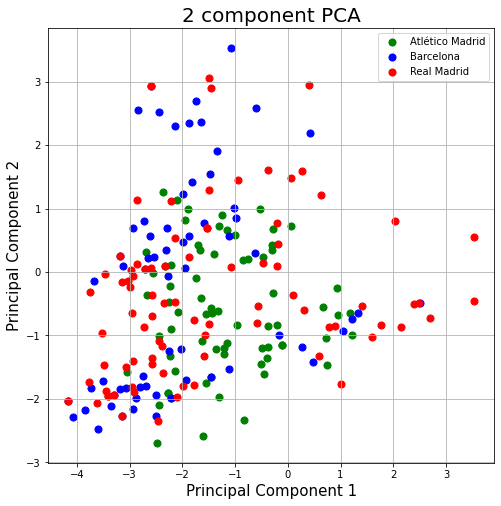

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Atlético Madrid', 'Barcelona', 'Real Madrid']
colors = ['g', 'b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Team'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [16]:
pca.explained_variance_ratio_

array([0.51046665, 0.33825686])

    - 'The explained variance' indicates how much information (variance) can be attributed to each of the 
    principal components. 
    - While converting 5 dimensional space to 2 dimensions, some of the variance (information) is lost. 
    - With explained_variance_ratio_, we can see that the first principal component contains 51.05% of the variance and the second principal component contains 33.82% of the variance. 
    - Together, the two components contain 84.87% of the information.

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Lost', fontsize = 15)
ax.set_ylabel('Won', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
targets = ['Atlético Madrid', 'Barcelona', 'Real Madrid']
colors = ['g', 'b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = sportsdata['Team'] == target
    ax.scatter(sportsdata_raw.loc[indicesToKeep, 'Lost']
               , sportsdata_raw.loc[indicesToKeep, 'Won']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Level 3
### Exercises 3

Continue with the sports theme data set you like and normalize the data taking into account the outliers.

In [17]:
sportsdata_raw.describe()

,S. No.,Position,Played,Won,Draw,Lost
count,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000
mean,9.326544,9.326544,33.306176,12.686597,7.930355,12.689882
std,5.340153,5.340153,5.600984,4.761609,3.544460,4.544876
min,1.000000,1.000000,18.000000,2.000000,0.000000,0.000000
25%,5.000000,5.000000,30.000000,10.000000,5.000000,10.000000
50%,9.000000,9.000000,34.000000,12.000000,8.000000,13.000000
75%,14.000000,14.000000,38.000000,15.000000,10.000000,16.000000
max,22.000000,22.000000,42.000000,32.000000,18.000000,29.000000


#### Box plot

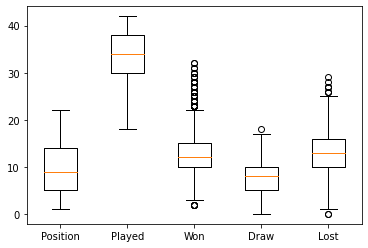

In [18]:
plt.boxplot(sportsdata_raw[num_cols])
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=num_cols)
plt.show()

    - It looks like the columns 'Position' and 'Played' have no outliers present in the data. 
    - Column 'Won' has the most outliers. 
    - Column 'Draw' has one outlier.
    - Column 'Lost' has several outliers as well. 

#### Histogram

<AxesSubplot:>

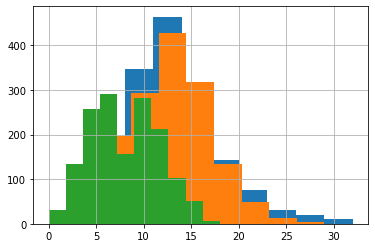

In [19]:
sportsdata_raw.Won.hist()
sportsdata_raw.Lost.hist()
sportsdata_raw.Draw.hist()

All the three columns identified to have outliers from the box plot show some degree of skewness in the histogram, confirming the present of outliers.

#### Outlier Treatment

    - Once identified, we need to treat the outliers.
    - I will use Quantile-based Flooring and Capping: 
        - The flooring (e.g., the 5th percentile) for the lower values 
        - The capping (e.g., the 95th percentile) for the higher values 
    - These values will be used for quantile-based flooring and capping. 

In [20]:
sportsdata_treated = sportsdata_raw.copy()

In [21]:
q1 = sportsdata_treated.Won.quantile(0.05)
q2 = sportsdata_treated.Won.quantile(0.95)
print(q1, q2)
sportsdata_treated.Won = np.where(sportsdata_treated.Won < q1, q1, sportsdata_treated.Won)
sportsdata_treated.Won = np.where(sportsdata_treated.Won > q2, q2, sportsdata_treated.Won)
#print(sportsdata_raw.Won.skew())
print(sportsdata_treated.Won.skew())

6.0 22.0
0.538396951527236


In [22]:
q1 = sportsdata_treated.Draw.quantile(0.05)
q2 = sportsdata_treated.Draw.quantile(0.95)
print(q1, q2)
sportsdata_treated.Draw = np.where(sportsdata_treated.Draw < q1, q1, sportsdata_treated.Draw)
sportsdata_treated.Draw = np.where(sportsdata_treated.Draw > q2, q2, sportsdata_treated.Draw)
#print(sportsdata_raw.Draw.skew())
print(sportsdata_treated.Draw.skew())

2.0 14.0
0.07713602619412642


In [23]:
q1 = sportsdata_treated.Lost.quantile(0.05)
q2 = sportsdata_treated.Lost.quantile(0.95)
print(q1, q2)
sportsdata_treated.Lost = np.where(sportsdata_treated.Lost < q1, q1, sportsdata_treated.Lost)
sportsdata_treated.Lost = np.where(sportsdata_treated.Lost > q2, q2, sportsdata_treated.Lost)
#print(sportsdata_raw.Lost.skew())
print(sportsdata_treated.Lost.skew())

5.0 20.0
-0.08523404671632376


<AxesSubplot:>

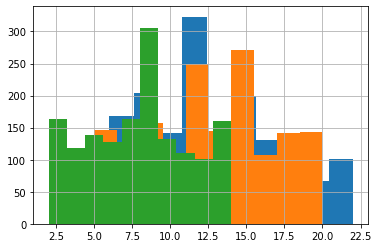

In [24]:
sportsdata_treated.Won.hist()
sportsdata_treated.Lost.hist()
sportsdata_treated.Draw.hist()

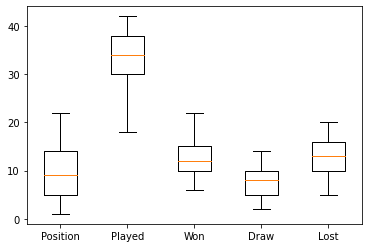

In [25]:
plt.boxplot(sportsdata_treated[num_cols])
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=num_cols)
plt.show()

We can see that there are no outliers in the data now! 

#### Normalization

In [26]:
cols_use = ['Season', 'Home \ Away', 'Position', 'Played', 'Won', 'Draw', 'Lost']
sportsdata_2 = sportsdata_treated[cols_use]
sportsdata_2 = sportsdata_2.rename(columns={'Home \ Away': 'Team'})
sportsdata_2.head()

,Season,Team,Position,Played,Won,Draw,Lost
0,2019-20,Alavés,16,38,10.0,9.0,19.0
1,2019-20,Athletic Bilbao,11,38,13.0,12.0,13.0
2,2019-20,Atlético Madrid,3,38,18.0,14.0,5.0
3,2019-20,Barcelona,2,38,22.0,7.0,6.0
4,2019-20,Celta Vigo,17,38,7.0,14.0,15.0


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sportsdata_2[num_cols] = scaler.fit_transform(sportsdata_treated[num_cols])
sportsdata_2.head()

,Season,Team,Position,Played,Won,Draw,Lost
0,2019-20,Alavés,1.250086,0.838311,-0.614944,0.327345,1.539019
1,2019-20,Athletic Bilbao,0.313475,0.838311,0.095900,1.216494,0.087426
2,2019-20,Atlético Madrid,-1.185102,0.838311,1.280640,1.809260,-1.848031
3,2019-20,Barcelona,-1.372424,0.838311,2.228432,-0.265421,-1.606099
4,2019-20,Celta Vigo,1.437408,0.838311,-1.325788,1.809260,0.571290


This is the dataset that has been normalized after taking outliers into account. 